## Problem Statement:
 * Create a Machine Learning model using various Classification
 Models to predict rainfall.

#                    The Daily Buzz Newspaper Company

In [1]:
# In My PC
pwd

'C:\\Users\\aryan\\Desktop\\New for Jupyter'

# Load The Data

In [2]:
# Import the pandas library for data manipulation and analysis
# Import the numpy library for numerical operations and array processing
# Import the seaborn library for data visualization
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Read a CSV file into a DataFrame
df=pd.read_csv('sydney_rain prediction.csv',header=0)

In [4]:
# over view of data
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,21-06-2017,Sydney,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,22-06-2017,Sydney,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,23-06-2017,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,24-06-2017,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [5]:
## delete non required columns

In [6]:
del df['Date']

In [7]:
del df['Location']

In [8]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [9]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


In [10]:
# Converting Categorical column 'Rain today and rain tommorow' into numerical
df = pd.get_dummies(df, drop_first=True,dtype=int)

In [11]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0


In [12]:
# to check missing values
df.isna().sum()

MinTemp               3
MaxTemp               2
Rainfall              6
Evaporation          51
Sunshine             16
Humidity9am          14
Humidity3pm          13
Pressure9am          20
Pressure3pm          19
Cloud9am            566
Cloud3pm            561
Temp9am               4
Temp3pm               4
RainToday_Yes         0
RainTomorrow_Yes      0
dtype: int64

In [13]:
# Fill missing values in each column with the mean of that column
for column in df.columns:
    if df[column].isnull().any():
        # Use mean to fill for numerical columns
        df[column].fillna(df[column].mean(), inplace=True)

# Display the first few rows to verify the changes
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [14]:
# To check missing values
df.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

In [15]:
#use describe function

# Get descriptive statistics for numerical columns
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


# Check for Outliers

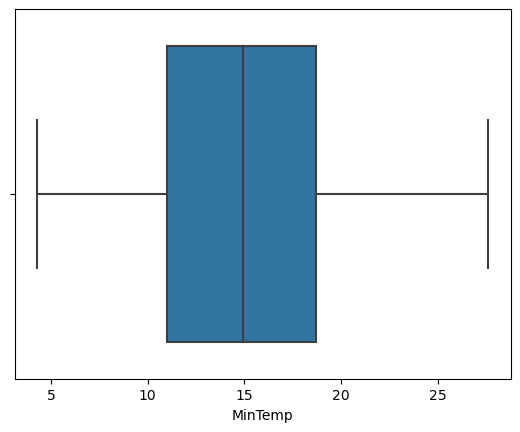

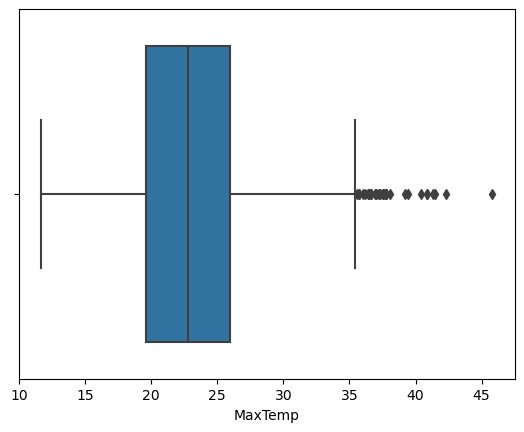

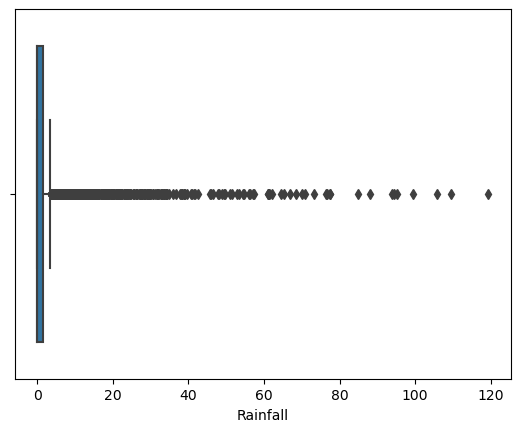

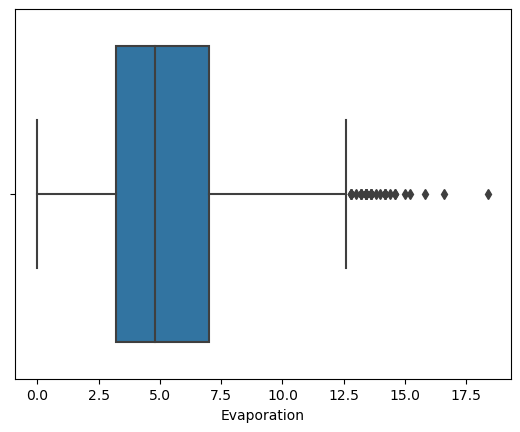

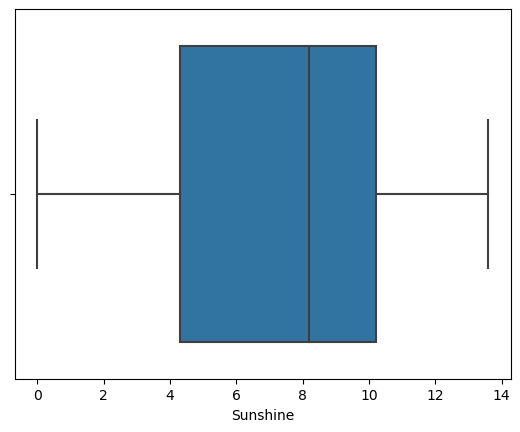

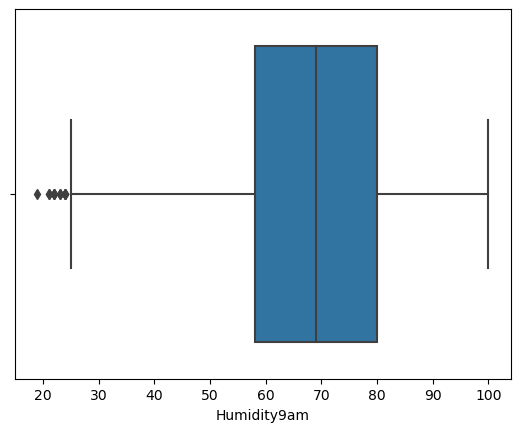

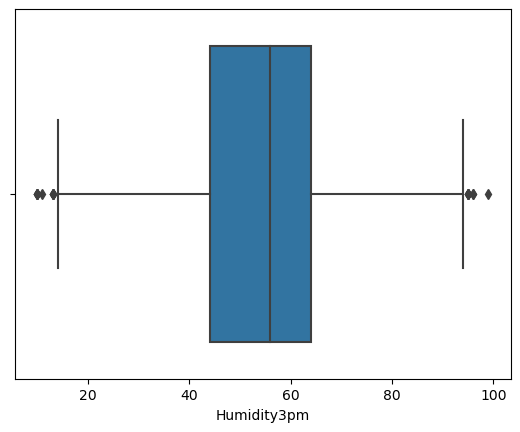

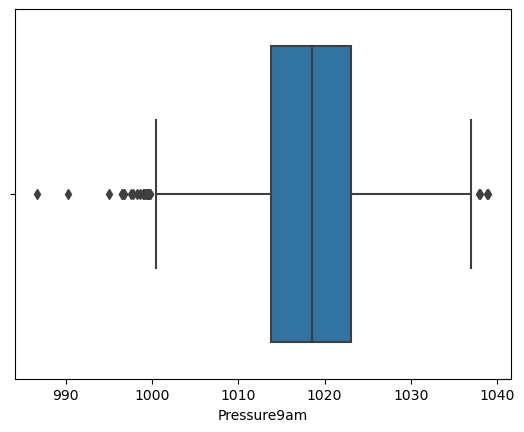

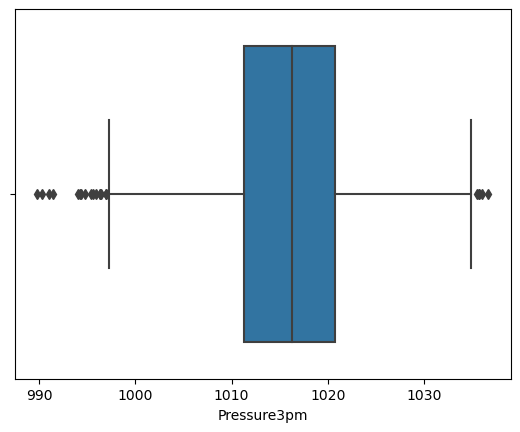

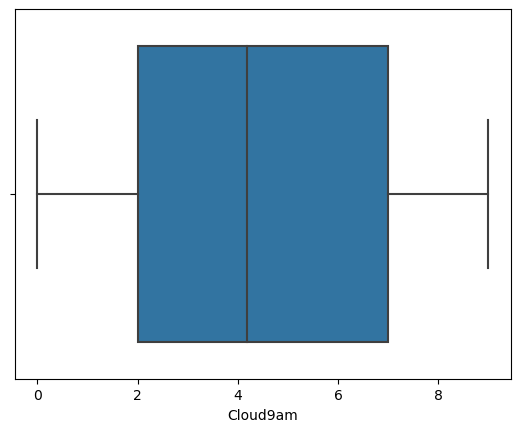

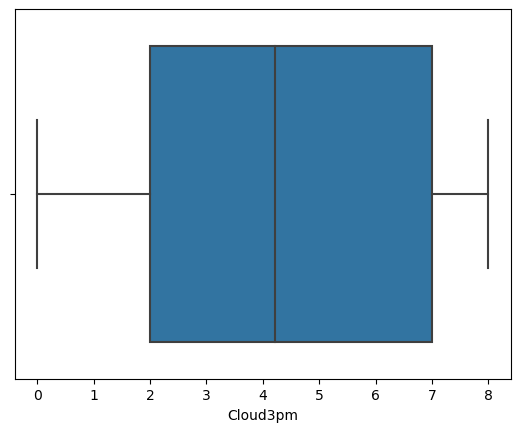

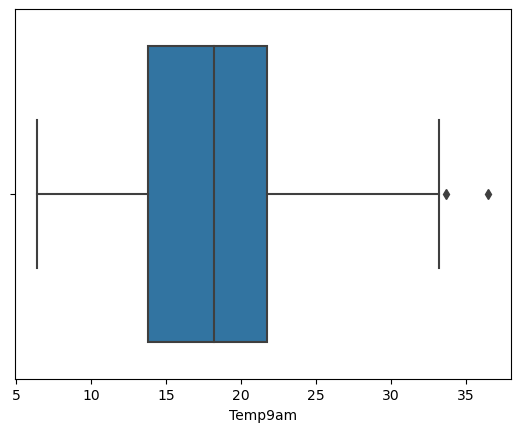

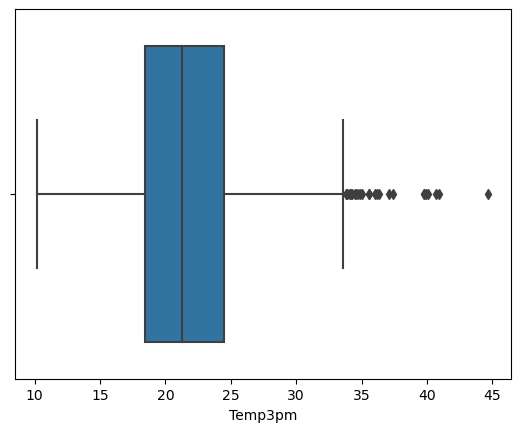

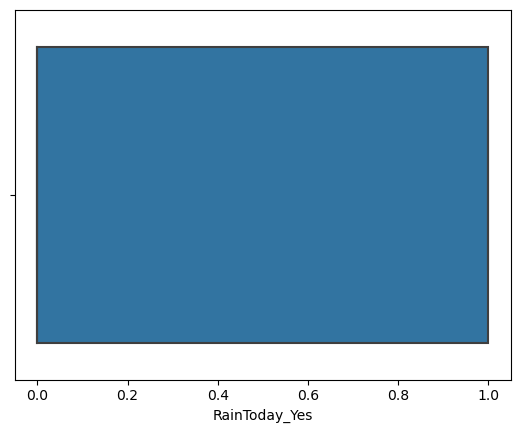

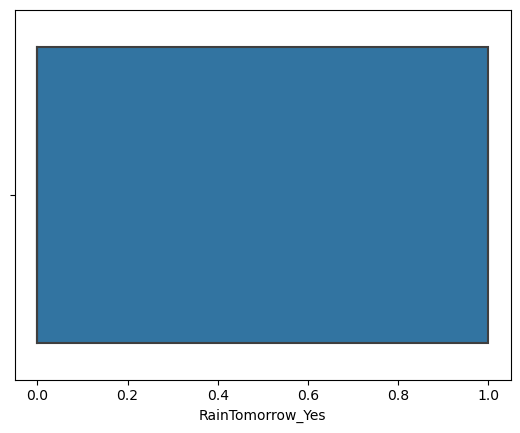

In [16]:
#check for outliers using seaborn

import matplotlib.pyplot as plt

# Create box plots for each numerical feature
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()


## Outliers are present in the data so we can remove outliers

In [17]:
# Corelation between variables
corr = df.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.770701,0.012866,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410,0.018690,0.079962
MaxTemp,0.770701,1.000000,-0.139837,0.509060,0.325107,-0.186875,-0.152310,-0.388533,-0.424653,-0.087381,-0.099167,0.858986,0.960026,-0.188334,-0.149269
Rainfall,0.012866,-0.139837,1.000000,-0.100468,-0.306119,0.330469,0.301337,-0.036988,0.003210,0.242049,0.200732,-0.055974,-0.143491,0.555015,0.293808
Evaporation,0.567623,0.509060,-0.100468,1.000000,0.174467,-0.394166,-0.101849,-0.345700,-0.300285,-0.037598,-0.037739,0.605348,0.473879,-0.228791,-0.064301
Sunshine,-0.062959,0.325107,-0.306119,0.174467,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.343563,-0.367080,-0.521637
Humidity9am,0.052362,-0.186875,0.330469,-0.394166,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.157149,0.400603,0.329011
Humidity3pm,0.270944,-0.152310,0.301337,-0.101849,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.213727,0.342936,0.471250
Pressure9am,-0.393024,-0.388533,-0.036988,-0.345700,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345926,-0.000113,-0.032465
Pressure3pm,-0.355764,-0.424653,0.003210,-0.300285,-0.094322,0.251304,0.183056,0.960460,1.000000,0.018972,-0.002903,-0.404472,-0.392218,0.056978,0.010977
Cloud9am,0.236288,-0.087381,0.242049,-0.037598,-0.660555,0.423560,0.453697,-0.011072,0.018972,1.000000,0.608995,0.088428,-0.089334,0.316502,0.329525


<Axes: >

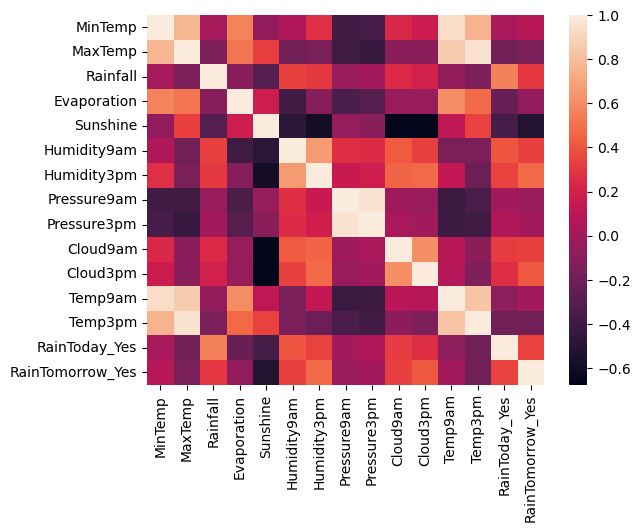

In [18]:
# Visual representation of corr
# Heatmap
sns.heatmap(data=corr)

## Handle Outliers 

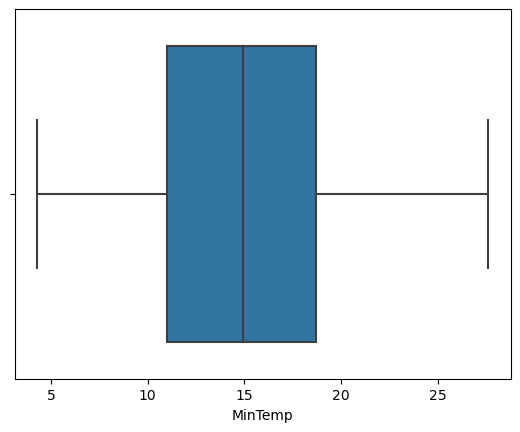

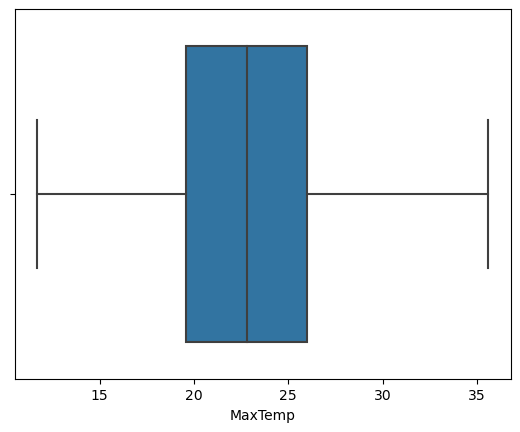

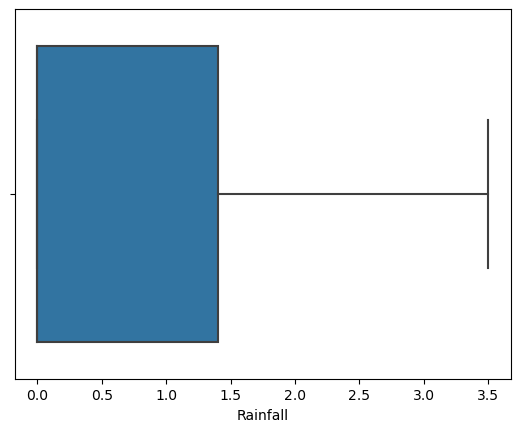

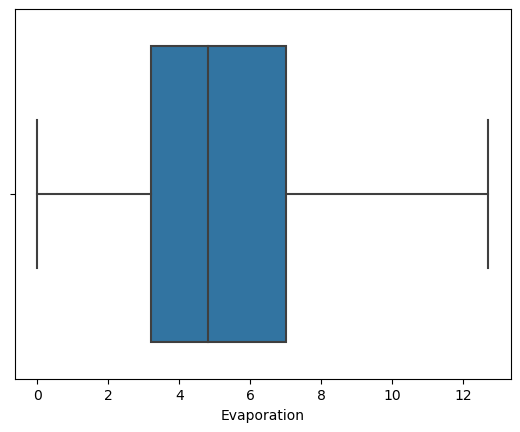

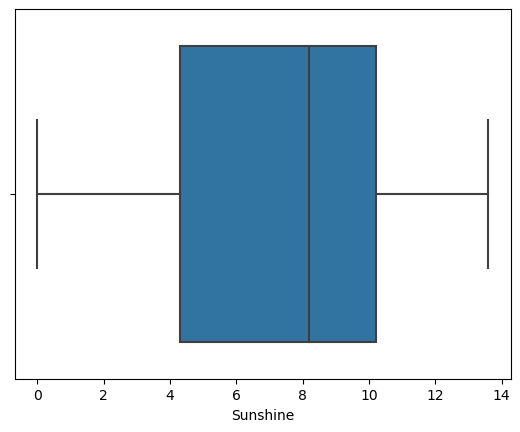

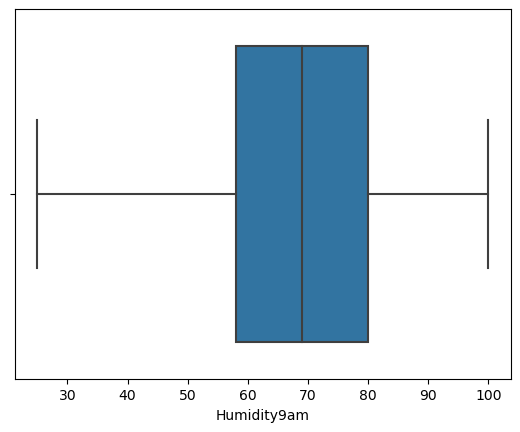

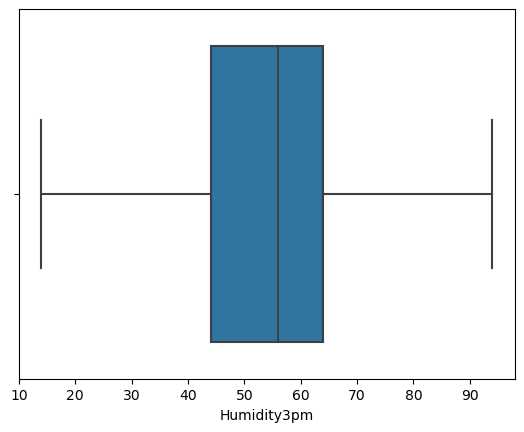

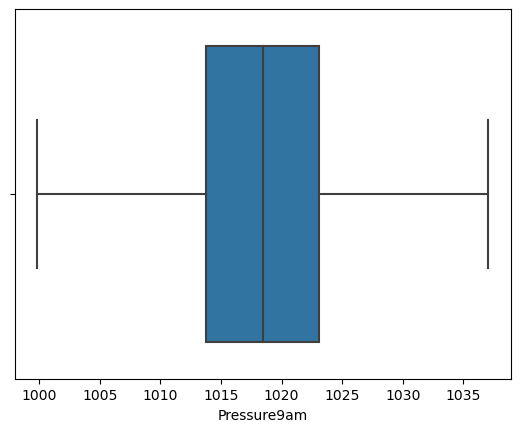

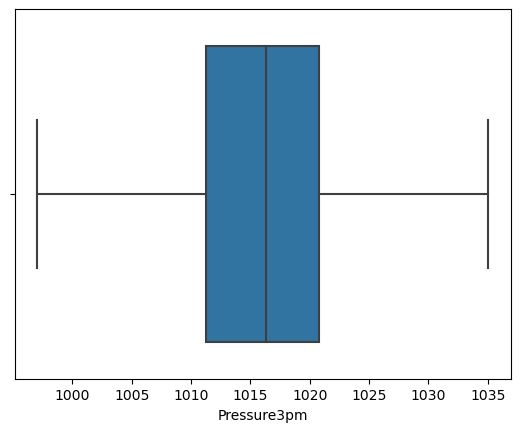

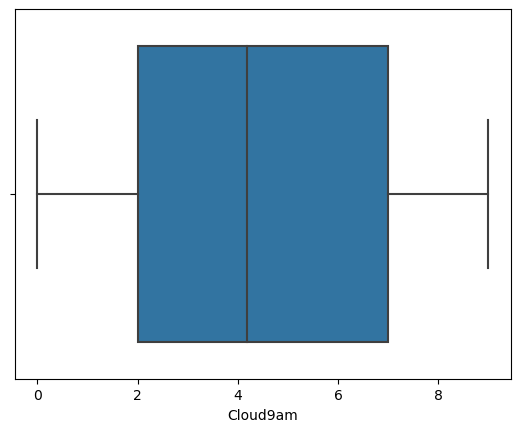

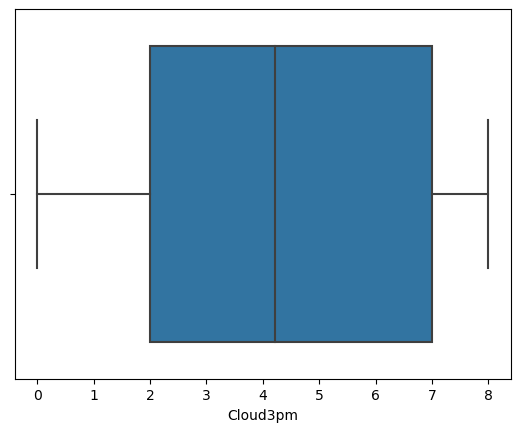

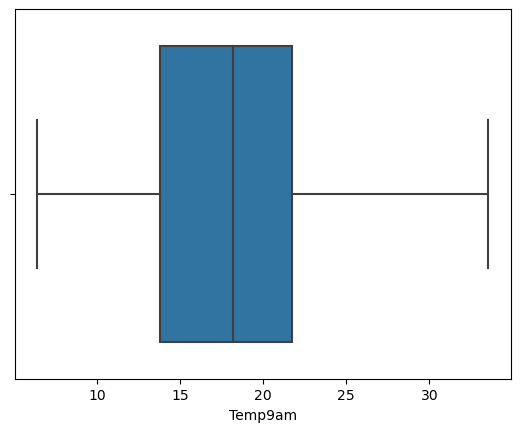

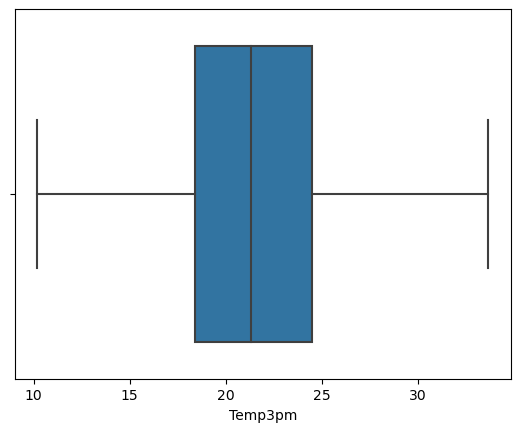

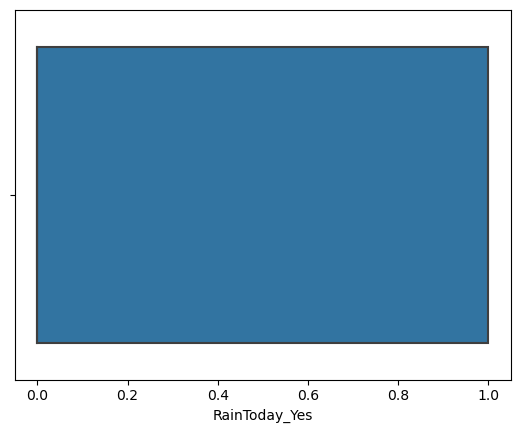

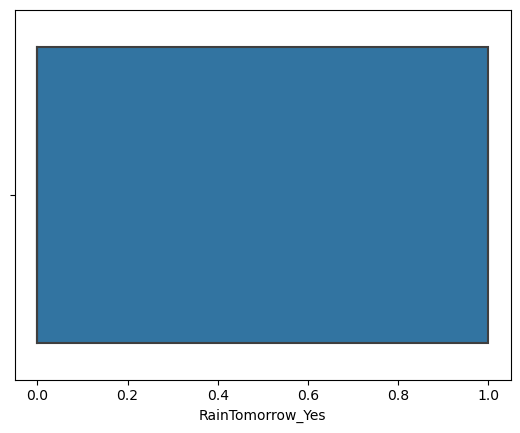

In [19]:
# Calculate the Interquartile Range (IQR) for each numerical feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the lower or upper bound
for col in df.select_dtypes(include=np.number).columns:
    df[col] = np.where((df[col] < lower_bound[col]), lower_bound[col], df[col])
    df[col] = np.where((df[col] > upper_bound[col]), upper_bound[col], df[col])

# Check for outliers again
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [20]:
# describe the whole data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,22.977196,0.868919,5.174396,7.179374,68.238300,54.703353,1018.360271,1016.030446,4.181523,4.218660,17.818813,21.510199,0.259515,0.259215
std,4.551593,4.409312,1.393618,2.714802,3.801737,15.025889,16.229354,6.946585,6.968893,2.505491,2.409531,4.890985,4.219776,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,25.000000,14.000000,999.850000,997.050000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,35.600000,3.500000,12.700000,13.600000,100.000000,94.000000,1037.050000,1035.050000,9.000000,8.000000,33.550000,33.650000,1.000000,1.000000


In [21]:
# Corelation between variables
corr = df.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.775690,0.023171,0.570698,-0.062959,0.052908,0.271728,-0.395526,-0.357223,0.236288,0.163519,0.939013,0.758371,0.018690,0.079962
MaxTemp,0.775690,1.000000,-0.188239,0.512694,0.328741,-0.183404,-0.144058,-0.390471,-0.425164,-0.088230,-0.101725,0.862195,0.960018,-0.188545,-0.151841
Rainfall,0.023171,-0.188239,1.000000,-0.235492,-0.375991,0.418365,0.354544,-0.008021,0.052547,0.329424,0.263782,-0.072416,-0.189999,0.953486,0.358048
Evaporation,0.570698,0.512694,-0.235492,1.000000,0.177087,-0.394423,-0.101240,-0.345633,-0.302191,-0.037937,-0.038892,0.609323,0.479570,-0.230889,-0.063748
Sunshine,-0.062959,0.328741,-0.375991,0.177087,1.000000,-0.489488,-0.583373,-0.046806,-0.096027,-0.660555,-0.676397,0.114541,0.346971,-0.367080,-0.521637
Humidity9am,0.052908,-0.183404,0.418365,-0.394423,-0.489488,1.000000,0.657988,0.263285,0.252339,0.423909,0.331951,-0.147018,-0.154477,0.401023,0.329345
Humidity3pm,0.271728,-0.144058,0.354544,-0.101240,-0.583373,0.657988,1.000000,0.153133,0.182897,0.454424,0.472158,0.129572,-0.204563,0.343130,0.471827
Pressure9am,-0.395526,-0.390471,-0.008021,-0.345633,-0.046806,0.263285,0.153133,1.000000,0.960806,-0.010435,-0.039749,-0.421709,-0.347228,0.000834,-0.032176
Pressure3pm,-0.357223,-0.425164,0.052547,-0.302191,-0.096027,0.252339,0.182897,0.960806,1.000000,0.019873,-0.002591,-0.406225,-0.391848,0.057890,0.011403
Cloud9am,0.236288,-0.088230,0.329424,-0.037937,-0.660555,0.423909,0.454424,-0.010435,0.019873,1.000000,0.608995,0.088716,-0.090757,0.316502,0.329525


<Axes: >

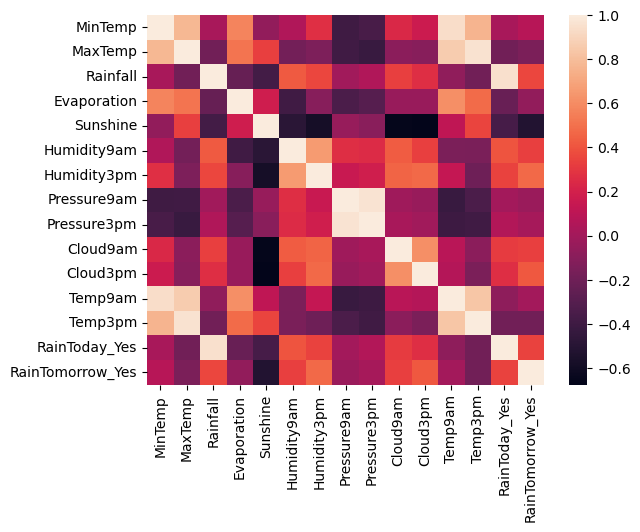

In [22]:
# Visual representation of corr
# Heatmap
sns.heatmap(data=corr)

## Apply Machine Learning Models

## Logistic Regression

In [23]:
# data
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0
4,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0.0,0.0
3333,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0.0,0.0
3334,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0.0,0.0
3335,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0.0,0.0


In [24]:
x=df[['Rainfall']]

In [25]:
y=df['RainTomorrow_Yes']

In [26]:
x.head()

,Rainfall
0,3.5
1,3.5
2,3.5
3,3.5
4,3.5


In [27]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: RainTomorrow_Yes, dtype: float64

In [28]:
# import the Logistic Regression 
from sklearn.linear_model import LogisticRegression

In [29]:
clf=LogisticRegression()

In [30]:
# Fit The Model
clf.fit(x,y)

LogisticRegression()

In [31]:
clf.coef_

array([[0.53376773]])

In [32]:
clf.intercept_

array([-1.62638112])

In [33]:
# import the statsmodels library
import statsmodels.api as sn

In [34]:
x_cons=sn.add_constant(x)

In [35]:
x_cons.head()

,const,Rainfall
0,1.0,3.5
1,1.0,3.5
2,1.0,3.5
3,1.0,3.5
4,1.0,3.5


In [36]:
# Import statsmodel library
import statsmodels.discrete.discrete_model as sm

In [37]:
logit=sm.Logit(y,x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.513194
         Iterations 5


In [38]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3335
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Apr 2024   Pseudo R-squ.:                  0.1032
Time:                        11:51:34   Log-Likelihood:                -1712.5
converged:                       True   LL-Null:                       -1909.5
Covariance Type:            nonrobust   LLR p-value:                 1.097e-87
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6269      0.054    -29.984      0.000      -1.733      -1.521
Rainfall       0.5342      0.027     19.543      0.000       0.481       0.588
==============================================================================
"""

## Logistic with Multiple predictor

In [39]:
# Split data into dependent and Independent Variable
x1=df.loc[:,df.columns!='RainTomorrow_Yes']

In [40]:
y1=df['RainTomorrow_Yes']

In [41]:
clf1=LogisticRegression()

In [42]:
clf1.fit(x1,y1)

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# Coefficient
clf1.coef_

array([[-0.12791402,  0.10162574,  0.2956101 ,  0.04963874, -0.22127845,
         0.00556804,  0.05121483, -0.08469118,  0.08036054, -0.12589917,
         0.18881998,  0.05106771, -0.03291087,  0.08455578]])

In [44]:
# Intercept
clf1.intercept_

array([0.00099482])

In [45]:
x_cons1=sn.add_constant(x1)

In [46]:
x_cons1.head()

,const,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
0,1.0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0
1,1.0,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0
2,1.0,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0
3,1.0,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0
4,1.0,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0


In [47]:
# Logit Regression
logit1=sm.Logit(y1,x_cons1).fit()

Optimization terminated successfully.
         Current function value: 0.380761
         Iterations 7


In [48]:
logit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3322
Method:                           MLE   Df Model:                           14
Date:                Sat, 27 Apr 2024   Pseudo R-squ.:                  0.3346
Time:                        11:51:34   Log-Likelihood:                -1270.6
converged:                       True   LL-Null:                       -1909.5
Covariance Type:            nonrobust   LLR p-value:                3.080e-264
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.5266      8.613      3.544      0.000      13.645      47.408
MinTemp          -0.2388      0.048     -4.952      0.000      -0.333      -0.144
MaxTemp           0.0746      0.044      1.698      0.090      -0.012       0.161
Rainfall          0.3269      0.107      3.046      0.002       0.117       0.537
Evaporation       0.0734      0.026      2.831      0.005       0.023       0.124
Sunshine         -0.2291      0.023    -10.056      0.000      -0.274      -0.184
Humidity9am       0.0137      0.007      1.977      0.048       0.000       0.027
Humidity3pm       0.0506      0.007      7.422      0.000       0.037       0.064
Pressure9am      -0.1072      0.031     -3.408      0.001      -0.169      -0.046
Pressure3pm       0.0729      0.030      2.403      0.016       0.013       0.132
Cloud9am         -0.0843      0.030     -2.776      0.006      -0.144      -0.025
Cloud3pm          0.1486      0.032      4.653      0.000       0.086       0.211
Temp9am           0.1436      0.051      2.791      0.005       0.043       0.244
Temp3pm          -0.0288      0.051     -0.564      0.573      -0.129       0.071
RainToday_Yes    -0.1368      0.336     -0.407      0.684      -0.796       0.522
=================================================================================
"""

## Predicting with confusion matrix and accuracy score

In [49]:
clf1.predict_proba(x1)

array([[0.07769803, 0.92230197],
       [0.22459209, 0.77540791],
       [0.08169109, 0.91830891],
       ...,
       [0.74976866, 0.25023134],
       [0.98270521, 0.01729479],
       [0.97391063, 0.02608937]])

In [50]:
y_pred=clf1.predict(x1)
y_pred

array([1., 1., 1., ..., 0., 0., 0.])

In [51]:
y_pred_03=(clf1.predict_proba(x1)[:,1]>=0.3)
y_pred_03

array([ True,  True,  True, ..., False, False, False])

In [52]:
# import the Confusion matrix
from sklearn.metrics import confusion_matrix

In [53]:
# print confusion matrix
confusion_matrix(y1,y_pred)

array([[2287,  185],
       [ 366,  499]], dtype=int64)

In [54]:
confusion_matrix(y1,y_pred_03)

array([[2041,  431],
       [ 228,  637]], dtype=int64)

In [55]:
# import accuracy Score
from sklearn.metrics import accuracy_score

In [56]:
# Calculate and Print Accuracy Score
accuracy_score(y1,y_pred)

0.8348816302067725

## Performance matrix

In [57]:
from sklearn.metrics import precision_score,recall_score

In [58]:
precision_score(y1,y_pred)

0.72953216374269

In [59]:
recall_score(y1,y_pred)

0.576878612716763

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
roc_auc_score(y1,y_pred)

0.7510202125072488

# Linear Discrimenant Analysis (LDA)

In [62]:
# import the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [63]:
# Fit the Model
clf_lda=LinearDiscriminantAnalysis()
clf_lda.fit(x1,y1)

LinearDiscriminantAnalysis()

In [64]:
# Predict the model
y_pred_lda=clf_lda.predict(x1)

In [65]:
y_pred_lda

array([1., 1., 1., ..., 0., 0., 0.])

In [66]:
# Print Confusion matrix
confusion_matrix(y,y_pred_lda)

array([[2266,  206],
       [ 354,  511]], dtype=int64)

In [67]:
# Calculate and Print Accuracy Score
accuracy_score(y,y_pred_lda)

0.8321845969433623

In [68]:
precision_score(y1,y_pred_lda)

0.7126917712691772

In [69]:
recall_score(y1,y_pred_lda)

0.5907514450867052

In [70]:
roc_auc_score(y1,y_pred_lda)

0.753709055876686

## K-Nearest Neighbours (KNN)

In [71]:
x1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0
4,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0.0
3333,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0.0
3334,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0.0
3335,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0.0


In [72]:
y1

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3332    0.0
3333    0.0
3334    0.0
3335    0.0
3336    0.0
Name: RainTomorrow_Yes, Length: 3337, dtype: float64

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
# Split data into dependent and Independent Variable
y_=df['Rainfall']

In [75]:
x_=df[['RainTomorrow_Yes']]

In [76]:
lm2=LinearRegression()

In [77]:
lm2.fit(x_,y_)

LinearRegression()

In [78]:
print(lm2.intercept_,lm2.coef_)

0.5737948724301187 [1.13852936]


In [79]:
lm2.predict(x_)

array([1.71232423, 1.71232423, 1.71232423, ..., 0.57379487, 0.57379487,
       0.57379487])

##  For Multi 

In [80]:
# Split data into dependent and Independent Variable
x_multi=df.drop('RainTomorrow_Yes',axis=1)

In [81]:
x_multi.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0
4,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0


In [82]:
y_multi=df['RainTomorrow_Yes']

In [83]:
y_multi.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: RainTomorrow_Yes, dtype: float64

In [84]:
# add constant in data
x_multi_cons=sn.add_constant(x_multi)

In [85]:
x_multi_cons.head()

,const,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
0,1.0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0
1,1.0,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0
2,1.0,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0
3,1.0,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0
4,1.0,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0


In [86]:
lm_multi=sn.OLS(y_multi,x_multi_cons).fit()

In [87]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       RainTomorrow_Yes   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          5.28e-309
Time:                        11:51:34   Log-Likelihood:                -1236.7
No. Observations:                3337   AIC:                             2503.
Df Residuals:                    3322   BIC:                             2595.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.4715      1.070      5.114      0.000       3.374       7.569
MinTemp          -0.0309      0.006     -5.588      0.000      -0.042      -0.020
MaxTemp           0.0108      0.006      1.920      0.055      -0.000       0.022
Rainfall          0.0630      0.015      4.269      0.000       0.034       0.092
Evaporation       0.0125      0.003      3.860      0.000       0.006       0.019
Sunshine         -0.0420      0.003    -14.646      0.000      -0.048      -0.036
Humidity9am       0.0006      0.001      0.744      0.457      -0.001       0.002
Humidity3pm       0.0075      0.001      9.263      0.000       0.006       0.009
Pressure9am      -0.0154      0.004     -4.033      0.000      -0.023      -0.008
Pressure3pm       0.0100      0.004      2.728      0.006       0.003       0.017
Cloud9am         -0.0144      0.004     -4.031      0.000      -0.021      -0.007
Cloud3pm          0.0139      0.004      3.730      0.000       0.007       0.021
Temp9am           0.0155      0.006      2.631      0.009       0.004       0.027
Temp3pm          -0.0037      0.007     -0.562      0.574      -0.016       0.009
RainToday_Yes    -0.0400      0.046     -0.867      0.386      -0.130       0.050
==============================================================================
Omnibus:                      255.310   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.166
Skew:                           0.728   Prob(JB):                     3.65e-69
Kurtosis:                       3.384   Cond. No.                     2.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# Create LinearRegression model
lm3=LinearRegression()

In [89]:
# Fit the Model
lm3.fit(x_multi,y_multi)

LinearRegression()

In [90]:
# Print intercept and Coefficient
print(lm3.intercept_,lm3.coef_)

5.471460848916967 [-0.03086585  0.01080912  0.06299671  0.01252839 -0.04200983  0.00060478
  0.00753174 -0.01538077  0.01004365 -0.01442237  0.01386212  0.01550512
 -0.00365443 -0.03995927]


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,random_state=0,test_size=0.2)

In [93]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2669, 14) (668, 14) (2669,) (668,)


In [94]:
lm_a=LinearRegression()

In [95]:
lm_a.fit(x_train,y_train)

LinearRegression()

In [96]:
# Prediction using test data
y_test_a=lm_a.predict(x_test)

In [97]:
y_train_a=lm_a.predict(x_train)

In [98]:
from sklearn.metrics import r2_score

In [99]:
r2_score(y_train,y_train_a)

0.3633709655707469

In [100]:
r2_score(y_test,y_test_a)

0.3401335906489984

#### Import preprocessing

In [101]:
from sklearn import preprocessing

In [102]:
# Scaling on data
scaler=preprocessing.StandardScaler().fit(x_train)
x_train_s=scaler.transform(x_train)

In [103]:
scaler=preprocessing.StandardScaler().fit(x_test)
x_test_s=scaler.transform(x_test)

In [104]:
x_test_s

array([[-0.54758843, -0.65707469, -0.44254195, ..., -0.18576557,
        -0.64799025, -0.56351951],
       [ 0.00722081,  0.59823677, -0.59083637, ..., -0.24790038,
        -0.28944356, -0.56351951],
       [ 0.14037502,  1.07753751, -0.59083637, ...,  0.72554502,
         1.312065  , -0.56351951],
       ...,
       [-0.88047397, -0.611427  , -0.59083637, ..., -0.12363075,
        -0.60018402, -0.56351951],
       [ 0.14037502,  1.83072439, -0.59083637, ...,  0.29060133,
         1.98135216, -0.56351951],
       [-1.79036112, -1.31896618, -0.59083637, ..., -1.84269391,
        -1.10214939, -0.56351951]])

In [105]:
x_train_s

array([[ 1.66833542,  2.68358645, -0.63182417, ...,  2.4004416 ,
         2.87750086, -0.59913379],
       [-1.81717459, -0.37411371, -0.63182417, ..., -1.20764905,
        -0.18568195, -0.59913379],
       [-0.65533792, -0.84975596, -0.06194445, ..., -0.26995317,
        -0.58779862, -0.59913379],
       ...,
       [-0.19498754,  0.39597373, -0.63182417, ...,  0.64735801,
        -1.53395547, -0.59913379],
       [-1.44451   , -0.8044567 , -0.63182417, ..., -1.6561123 ,
        -0.58779862, -0.59913379],
       [-0.17306609,  0.03357964, -0.63182417, ...,  0.23966415,
         0.07451118, -0.59913379]])

## KNN

In [106]:
# Import KNN library
from sklearn.neighbors import KNeighborsClassifier

In [107]:
# Create KNN model and fit them
clf_knn_1=KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [108]:
# Print Confusion matrix
confusion_matrix(y_test,clf_knn_1.predict(x_test_s))

array([[419,  91],
       [ 75,  83]], dtype=int64)

In [109]:
# Calculate and Print Accuracy Score  
accuracy_score(y_test,clf_knn_1.predict(x_test_s))

0.7514970059880239

In [110]:
accuracy_score(y_train,clf_knn_1.predict(x_train_s))

1.0

In [111]:
clf_knn_3=KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(x_train_s,y_train)
accuracy_score(y_test,clf_knn_3.predict(x_test_s))

0.8053892215568862

## Import GridSearchCV

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
par={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30]}

In [114]:
grid_s_cv=GridSearchCV(KNeighborsClassifier(),par)

In [115]:
# Fit the Model on train data
grid_s_cv.fit(x_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                         30]})

In [116]:
grid_s_cv.best_params_

{'n_neighbors': 20}

In [117]:
optimised_KNN=grid_s_cv.best_estimator_

In [118]:
y_test_pred=optimised_KNN.predict(x_test_s)

In [119]:
# Print Confusion matrix
confusion_matrix(y_test,y_test_pred)

array([[479,  31],
       [ 84,  74]], dtype=int64)

In [120]:
# Calculate and Print accuracy score
accuracy_score(y_test,y_test_pred)

0.8278443113772455

## Decision tree

In [121]:
# Import tree from Sklearn 
from sklearn import tree

In [127]:
from IPython.display import Image

In [128]:
import pydotplus

## Train Classification tree

In [129]:
# Create Classification Tree model
clftree=tree.DecisionTreeClassifier(max_depth=3)

In [130]:
# Fit the Data on train data
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [131]:
y_train_pred=clftree.predict(x_train)
y_test_pred=clftree.predict(x_test)

In [132]:
y_test_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [133]:
y_train_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [135]:
# Confusion matrix
confusion_matrix(y_train,y_train_pred)

array([[1777,  185],
       [ 279,  428]], dtype=int64)

In [136]:
confusion_matrix(y_test,y_test_pred)

array([[457,  53],
       [ 73,  85]], dtype=int64)

In [137]:
# Calculate and Print Accuracy Score
accuracy_score(y_test,y_test_pred)

0.811377245508982

In [138]:
accuracy_score(y_train,y_train_pred)

0.8261521168977145

## Plot Tree

In [139]:
dot_data=tree.export_graphviz(clftree,feature_names=x_train.columns,out_file=None,filled=True)

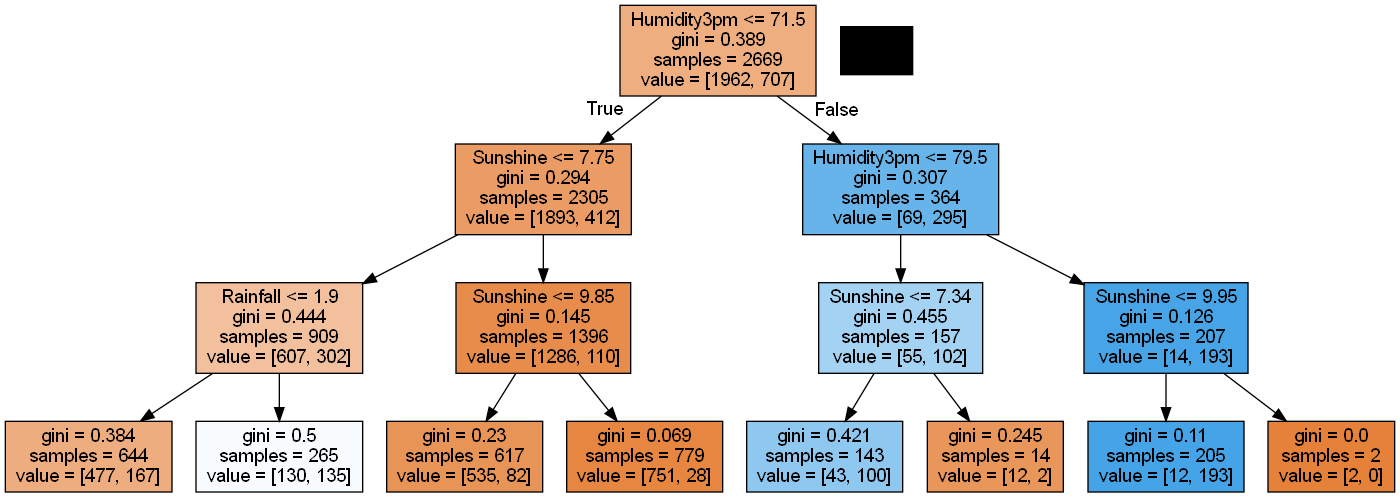

In [140]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

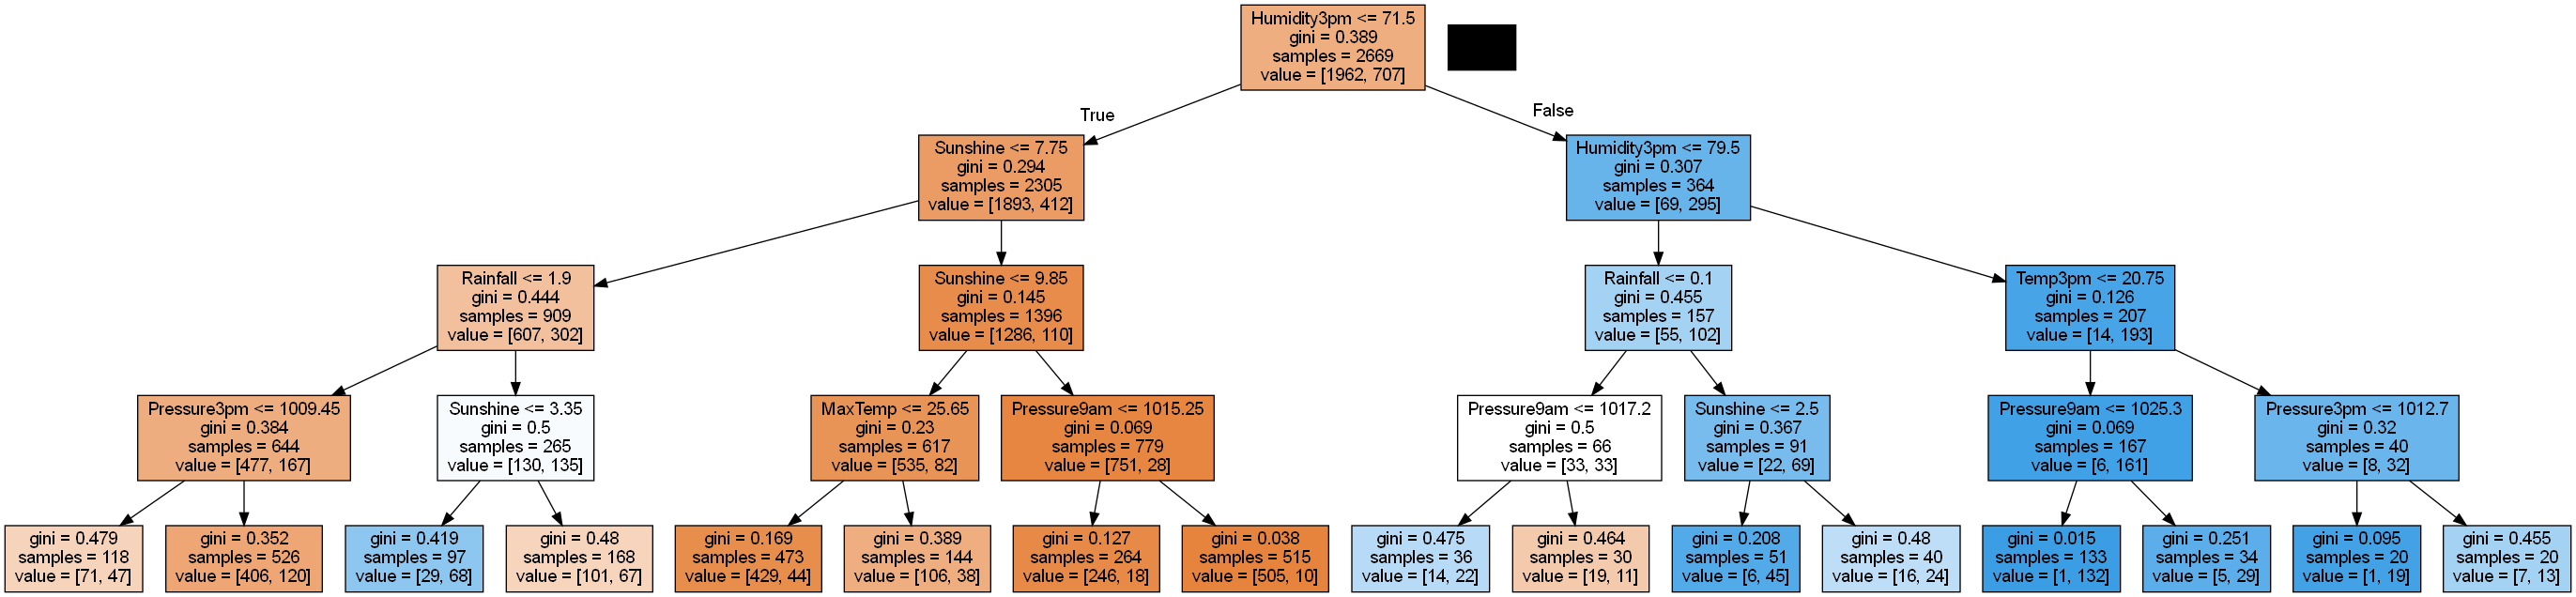

In [141]:
clftree3=tree.DecisionTreeClassifier(min_samples_leaf=20,max_depth=4)
clftree3.fit(x_train,y_train)
dot_data=tree.export_graphviz(clftree3,out_file=None,feature_names=x_train.columns,filled=True)
graph3=pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [142]:
# Calculate and Print accuracy score on test data
accuracy_score(y_test,clftree3.predict(x_test))

0.8233532934131736

In [143]:
# Calculate and Print accuracy score on train data
accuracy_score(y_train,clftree3.predict(x_train))

0.8373922817534657

# Bagging Classifier

In [144]:
# Create bagging classifier
clftree=tree.DecisionTreeClassifier()

In [145]:
from sklearn.ensemble import BaggingClassifier

In [146]:
bagclf=BaggingClassifier(estimator=clftree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [147]:
# fit the Model on train data
bagclf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [148]:
confusion_matrix(y_test,bagclf.predict(x_test))

array([[466,  44],
       [ 79,  79]], dtype=int64)

In [149]:
accuracy_score(y_test,bagclf.predict(x_test))

0.8158682634730539

In [150]:
accuracy_score(y_train,bagclf.predict(x_train))

1.0

# Random Forest Classifier

In [151]:
# Import Random Forest from sklearn
from sklearn.ensemble import RandomForestClassifier

In [152]:
# Create Random forest Classifier
randforclf=RandomForestClassifier(n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [153]:
# Fit the Model on train data
randforclf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [154]:
confusion_matrix(y_test,randforclf.predict(x_test))

array([[482,  28],
       [ 77,  81]], dtype=int64)

In [155]:
accuracy_score(y_test,randforclf.predict(x_test))

0.842814371257485

In [156]:
accuracy_score(y_train,randforclf.predict(x_train))

1.0

## Grid Search

In [157]:
# Import Grid Search from sklearn
from sklearn.model_selection  import GridSearchCV

In [158]:
rf_clf=RandomForestClassifier(n_estimators=250,random_state=42)

In [159]:
param_grid={"max_features":[4,5,7,8,9,10],
           "min_samples_split":[3,2,10]}

In [160]:
grid_search=GridSearchCV(rf_clf,param_grid,n_jobs=-1,cv=5,scoring='accuracy')

In [161]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 7, 8, 9, 10],
                         'min_samples_split': [3, 2, 10]},
             scoring='accuracy')

In [162]:
grid_search.best_params_

{'max_features': 10, 'min_samples_split': 10}

In [163]:
cvrf_clf=grid_search.best_estimator_

In [164]:
confusion_matrix(y_test,cvrf_clf.predict(x_test))

array([[473,  37],
       [ 77,  81]], dtype=int64)

In [165]:
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.8293413173652695

In [166]:
accuracy_score(y_train,cvrf_clf.predict(x_train))

0.9602847508430123

## Gradient Boosting Classifier

In [167]:
# Import GradientBoosting from sklearn
from sklearn.ensemble import GradientBoostingClassifier

In [168]:
gbc_clf=GradientBoostingClassifier()

In [169]:
gbc_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [170]:
accuracy_score(y_train,gbc_clf.predict(x_train))

0.8759835144248782

In [171]:
accuracy_score(y_test,gbc_clf.predict(x_test))

0.8323353293413174

In [172]:
gbc_clf2=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)

In [173]:
#Fit the model on train data
gbc_clf2.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [174]:
accuracy_score(y_train,gbc_clf2.predict(x_train))

0.84563506931435

In [175]:
accuracy_score(y_test,gbc_clf2.predict(x_test))

0.8458083832335329

## Ada Boost Classifier

In [176]:
# Import AdaBoost from sklearn
from sklearn.ensemble import AdaBoostClassifier

In [177]:
ada_clf=AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

In [178]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [179]:
accuracy_score(y_train,ada_clf.predict(x_train))

0.8531285125515174

In [180]:
accuracy_score(y_test,ada_clf.predict(x_test))

0.8413173652694611

In [181]:
ada_clf2=AdaBoostClassifier(learning_rate=0.05,n_estimators=500)

In [182]:
ada_clf2.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=500)

In [183]:
accuracy_score(y_test,ada_clf2.predict(x_test))

0.844311377245509

In [184]:
accuracy_score(y_train,ada_clf2.predict(x_train))

0.8448857249906332

## XG Boost

In [185]:
# Import xgboost
import xgboost as xgb

In [186]:
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=0.3,n_jobs=-1)

In [187]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [188]:
accuracy_score(y_train,xgb_clf.predict(x_train))

1.0

In [189]:
accuracy_score(y_test,xgb_clf.predict(x_test))

0.8338323353293413

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

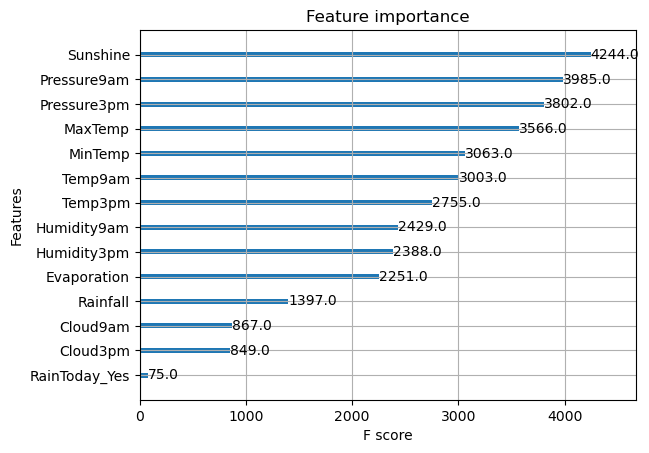

In [190]:
# Feature importance graph
xgb.plot_importance(xgb_clf)

In [191]:
xgb_clf=xgb.XGBClassifier(n_estimators=250,learning_rate=0.3,random_state=42)

In [192]:
param_test={
    "max_depth":range(3,10,2),
    "gamma":[0.1,0.2,0.3],
    "subsample":[0.8,0.9],
    "colsample_bytree":[0.8,0.9],
    "reg_alpha":[0.01,0.1,1]
}

In [193]:
grid_search=GridSearchCV(xgb_clf,param_test,n_jobs=-1,cv=5,scoring='accuracy')

In [194]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [195]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 5,
 'reg_alpha': 1,
 'subsample': 0.9}

In [196]:
cvrf_clf=grid_search.best_estimator_

In [197]:
# Print Confusion matrix
confusion_matrix(y_test,cvrf_clf.predict(x_test))

array([[477,  33],
       [ 70,  88]], dtype=int64)

In [198]:
# print Accuracy Score on test data
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.8458083832335329

In [199]:
# Print and calculate accuracy score on train data
accuracy_score(y_train,cvrf_clf.predict(x_train))

0.9906331959535406

# TASKS

# Q1 Your views about the problem statement?

## ANS-- My View
* Context and Company Background: The Daily Buzz, a small newspaper company in Sydney, highlights its unique approach in market competition, community engagement,innovation and adaption,technological integration.

* Data Description: The Dataset conatins information about Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,	Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow. This information will be used to train and test the predictive model.

* Classification Task: The primary objective is to perform a classification task, where the aim is to predict rainfall, specifically the RainTommorow is Yes or No.

* Role of Statistics: The role of statistics is to build and check the accuracy of the model.

* Data Preprocessing: Data Preprocessing is most important task as it involves tasks like handling missing values,Delete unnessary columns, data cleaning, detection of outliers, categorical variables, normalization, and feature selection.

# Q2 What will be your approach to solving this task?

## ANS-- Creating a Rainfall Prediction Model: A Systematic Approach
- **Data Understanding:**
  - Begin by thoroughly understanding the provided dataset, including its structure, columns, and the meaning of each variable. Gain insights into the data's distribution, summary statistics, and potential outliers.
- **Data Preprocessing:**
  - Handle Missing Values: Identify and address missing data by imputation or removal, ensuring that data is complete.
  - Delete Unnessary Data: Delete columns of unused in the data like ( Date and Location ).
  - Outlier Detection and Treatment: Detect and handle outliers in the dataset, which could impact the model's accuracy.
  - Normalize Data: Normalize numerical features to bring them to a common scale to avoid any feature dominating the model.
  - Feature Selection: Use statistical techniques such as correlation analysis to select the most relevant features for         rainfall prediction.
- **Model Selection:**
    - Choose different Classificaton models  to build and evaluate the predictive models.
- **Model Training and Evaluation:**
    - Split the dataset into training and testing sets to train the models and assess their performance.
    - Use appropriate evaluation metrics like Confusion matrix and accuracy score to measure the model's accuracy.
    - Experiment with different hyperparameters for each model and use cross-validation to avoid overfitting.
- **Model Comparison:**
    - Compare the performance of different models and select the one with the best accuracy and generalization.
- **Further Improvement:**
    - Consider additional techniques for model improvement, such as feature engineering, hyperparameter tuning, and             ensemble methods.

# Q3 What were the available ML model options you had to perform this task?

# ANS-- The available ML model options had to perform on this task

**1. Logistic Regression:**
- A linear model used for binary classification, which estimates the probability that a given input belongs to a certain category.

**2. Linear Discriminant Analysis(LDA):**
- A method used for dimensionality reduction and classification, which finds the linear combinations of features that best separate different classes.

**3.. K Nearest Neighbours(KNN):**
- A simple algorithm that classifies objects based on the majority class among their K nearest neighbors in the feature space.

**4. Decision Tree:**
- A tree-like model where each internal node represents a decision based on a feature, leading to splits that ultimately classify the data into classes at the leaf nodes

**5. Random Forest:**
- An ensemble method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting

**6. Gradient Boost:**
- An ensemble technique that builds a series of weak learners (typically decision trees) sequentially, where each subsequent learner corrects the errors made by the previous ones.

**7. ADA Boost:**
- Another ensemble method that combines multiple weak learners (e.g., decision trees) sequentially, giving more weight to incorrectly classified instances in each iteration.

**8. Bagging Classifier:**
- A general ensemble method that builds multiple models independently and combines their predictions through averaging or voting, with each model trained on a random subset of the data.

**9. XG Boost (Extreme Gradient Boosting):**
- A highly efficient implementation of gradient boosting that uses a more regularized model structure and optimized algorithms for better performance and speed.

# Q4 Which model’s performance is best and what could be the possible reason for that?

# ANS-- ALL Models are best  

#### To compare the performance of different machine learning models, we'll focus on the Accuracy Score metric, which measures the goodness of fit of the models. A higher Accuracy Score indicates a better fit to the data.


**Scenario (Accuracy Score) :**

- Logistic Regression = 0.8348
- Linear Discriminant Analysis (LDA) = 0.8348
- K Nearest Neighbours (KNN) = 0.7514
- KNN with GridSearch = 0.8278
- Decision Classification Tree = 0.8233
- Random Forest = 0.8428
- Random Forest with GridSearch = 0.8293
- ADA Boost = 0.8443
- Gradient Boost = 0.8456
- Bagging Classifier = 0.8158
- XG Boost = 0.8458

# Q5 What steps can you take to improve this selected model’s performance even further?

# ANS-- To  improve this  selected model performance, I can take these steps:
- **Increase the Number of Trees (Estimators):**
    Random Forest's performance often benefits from increasing the number of decision trees (estimators) in the ensemble.
- **Feature Engineering:** Identify and create new features that capture important information in the data. This might involve transformations, scaling, or combinations of existing features.
- **Tune Hyperparameters:** Perform a more thorough hyperparameter tuning by experimenting with different values for parameters like max_depth, min_samples_split, min_samples_leaf, and max_features. Grid Search or Randomized Search can help find the optimal combination of hyperparameters.